# Preparing the dataset for model building after the data preprocessing 

In [1]:
import logging

logger = logging.getLogger()

file_handler = logging.FileHandler(filename='project_log.log', mode='w')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

logger.setLevel(logging.DEBUG)
logger.info('RUNNING!')

In [2]:
logger.info('Importing Libraries for model building!')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
CC_DF_final=pd.read_csv('Final_Data.csv')

In [5]:
CC_DF_final.drop('Unnamed: 0',axis = 1, inplace = True)

In [6]:
CC_DF_final

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.000000,2,2,1,24.000000,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000.000000,2,2,2,26.000000,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000.000000,2,2,2,34.000000,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000.000000,2,2,1,37.000000,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000.000000,1,2,1,57.000000,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,80000.000000,1,1,1,35.945412,2,1,1,2,2,...,41087,40597,42101,3308,1429,2746,476,2238,2046,1
46724,200000.000000,1,1,1,42.667513,-1,-1,-1,-1,-1,...,480,2517,0,290,79,480,2517,0,228,1
46725,120000.000000,1,2,2,30.443648,1,-2,-2,-2,-2,...,-1946,-1946,-1946,2,0,0,0,0,0,1
46726,194668.588007,1,2,1,33.132565,6,5,4,3,2,...,209623,203659,193689,0,153,0,0,75986,4899,1


# Splitting the data

In [7]:
logger.info('DATA PREPARING FOR MODELING STARTS!')

In [8]:
X = CC_DF_final.drop('default',axis=1)
y = CC_DF_final['default']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


# Scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [11]:
logger.info('DATA PREPARING FOR MODELING ENDS!')

# Model Building

In [12]:
logger.info('MODELING STARTS!')

In [13]:
# Helper Function for printing Accuracy matrices, plotting Confusiuon matrix and ROC curve

def helper(model,X_train,y_train,X_test,y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(train_pred, y_train)
    test_acc = accuracy_score(test_pred, y_test)
    prec = precision_score(y_test, test_pred)
    recc = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)
    acc_matrices = {'Train accuracy':train_acc,'Test accuracy':test_acc,'Precision':prec,'Recall':recc,'F1 Score':f1}

    print('\nTraining Accuracy Score: ',train_acc)
    print('Testing Accuracy Score: ',test_acc)
    print('Precision on test data: ',prec)
    print('Recall on test data: ',recc)
    print('F1 score on test data: ',f1)
    print('\n========================================================')
    print('Classification Report on Train data')
    print(classification_report(train_pred, y_train))
    print('\n========================================================')
    print('Classification Report on Test data')
    print(classification_report(test_pred, y_test))

    print('\n========================================================')
    # Plotting Confusion Matrix and ROC curve
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(test_pred, y_test)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
                xticklabels = ['Non-default', 'Default'], 
                yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(test_pred, y_test)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()
    return acc_matrices

# 1. Logistic Regression

In [14]:
logger.info('MODEL - LOGISTIC REGRESSION STARTS!')

In [15]:
LogR = LogisticRegression()
LogR.fit(X_train_scaled,y_train)

LogisticRegression()

In [16]:
X_test_scaled = scaler.transform(X_test)


Training Accuracy Score:  0.7235918507104948
Testing Accuracy Score:  0.7114363978770758
Precision on test data:  0.7158002735978112
Recall on test data:  0.7100932994062765
F1 score on test data:  0.7129353657498084

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.73      0.72      0.73     17680
           1       0.72      0.72      0.72     17366

    accuracy                           0.72     35046
   macro avg       0.72      0.72      0.72     35046
weighted avg       0.72      0.72      0.72     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      5834
           1       0.71      0.72      0.71      5848

    accuracy                           0.71     11682
   macro avg       0.71      0.71      0.71     11682
weighted avg       0.71      0.71      0.71     11682




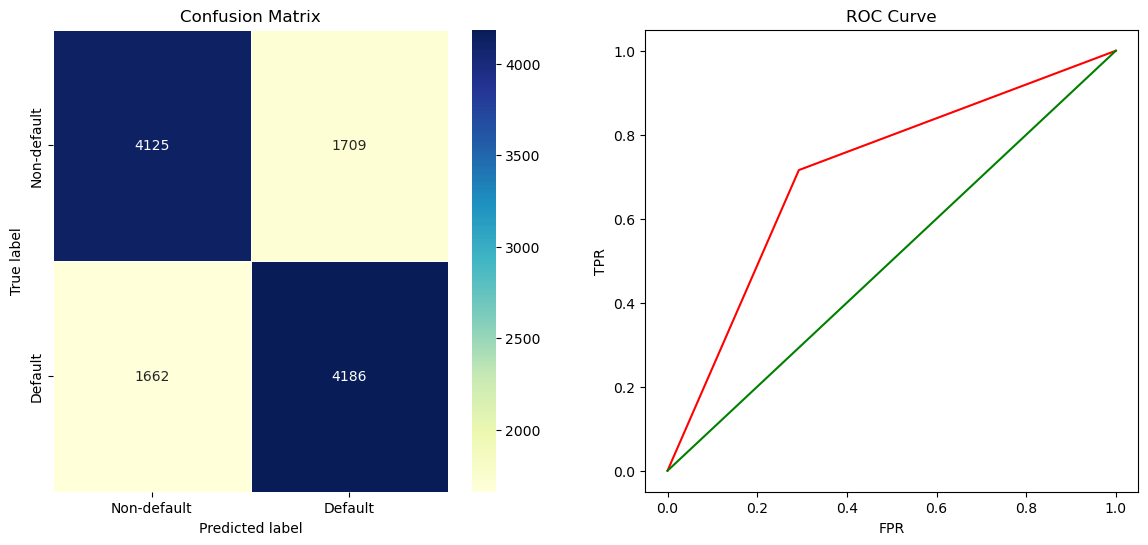

{'Train accuracy': 0.7235918507104948,
 'Test accuracy': 0.7114363978770758,
 'Precision': 0.7158002735978112,
 'Recall': 0.7100932994062765,
 'F1 Score': 0.7129353657498084}

In [17]:
helper(LogR,X_train_scaled,y_train,X_test_scaled, y_test)

In [18]:
logger.info('MODEL - LOGISTIC REGRESSION ENDS!')

# 2.Decision Tree

In [19]:
logger.info('MODEL - DECICION TREE STARTS!')

In [20]:
D_tree = DecisionTreeClassifier()
D_tree.fit(X_train_scaled,y_train)

DecisionTreeClassifier()


Training Accuracy Score:  0.9996575928779319
Testing Accuracy Score:  0.7482451634994007
Precision on test data:  0.7455119680851063
Recall on test data:  0.7608142493638677
F1 score on test data:  0.7530853832591722

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17589
           1       1.00      1.00      1.00     17457

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      5666
           1       0.76      0.75      0.75      6016

    accuracy                           0.75     11682
   macro avg       0.75      0.75      0.75     11682
weighted avg       0.75      0.75      0.75     11682




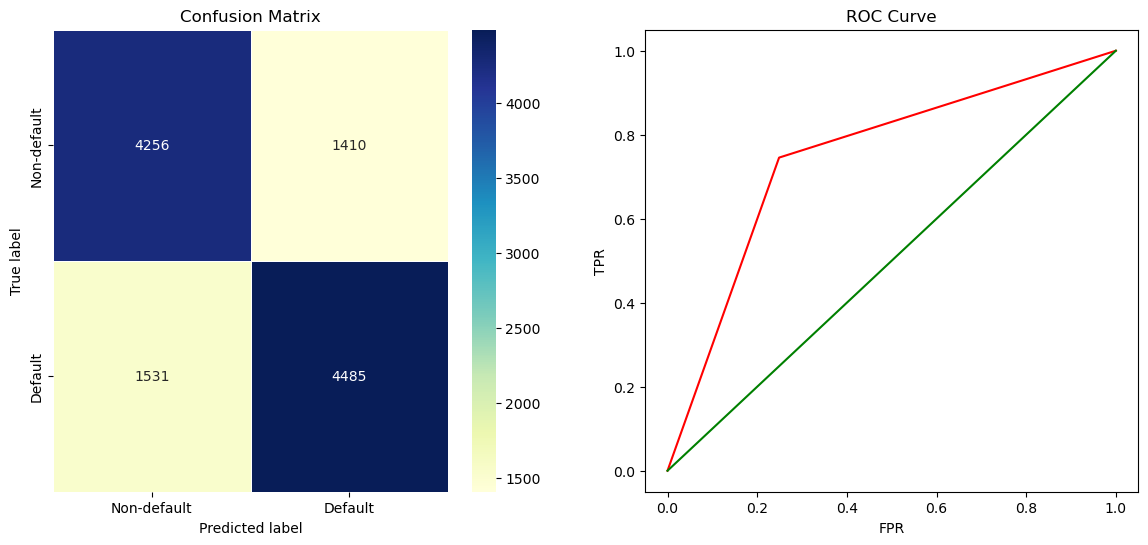

{'Train accuracy': 0.9996575928779319,
 'Test accuracy': 0.7482451634994007,
 'Precision': 0.7455119680851063,
 'Recall': 0.7608142493638677,
 'F1 Score': 0.7530853832591722}

In [21]:
helper(D_tree,X_train_scaled,y_train,X_test_scaled,y_test)

In [22]:
logger.info('MODEL - DECICION TREE ENDS!')

# 3.Random Forest

In [23]:
logger.info('MODEL - RANDOM FOREST STARTS!')

In [24]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9996575928779319
Testing Accuracy Score:  0.8412942989214176
Precision on test data:  0.8592
Recall on test data:  0.8198473282442749
F1 score on test data:  0.8390625

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17581
           1       1.00      1.00      1.00     17465

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6057
           1       0.82      0.86      0.84      5625

    accuracy                           0.84     11682
   macro avg       0.84      0.84      0.84     11682
weighted avg       0.84      0.84      0.84     11682




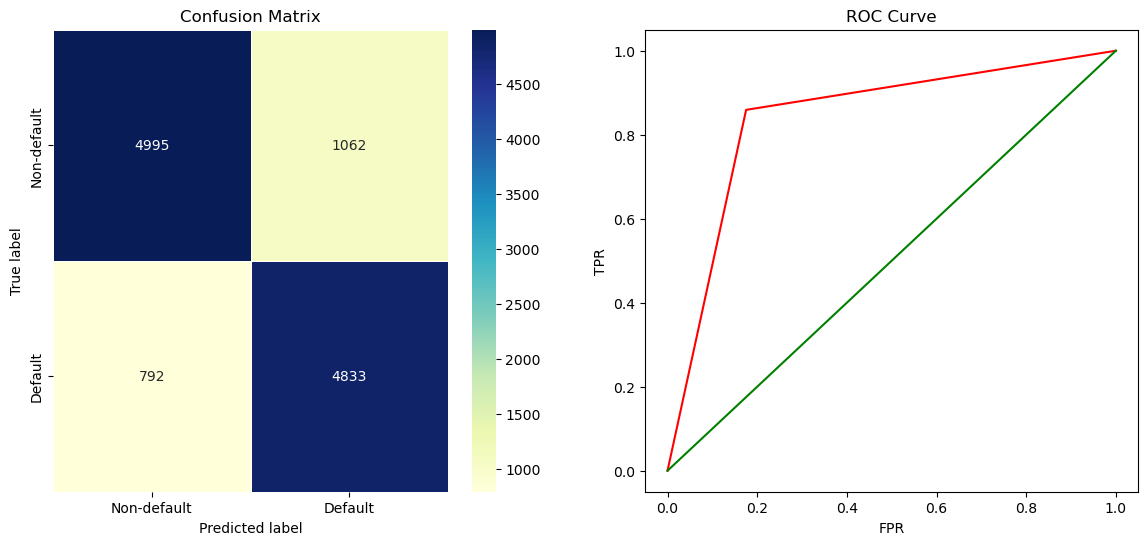

{'Train accuracy': 0.9996575928779319,
 'Test accuracy': 0.8412942989214176,
 'Precision': 0.8592,
 'Recall': 0.8198473282442749,
 'F1 Score': 0.8390625}

In [25]:
helper(RF,X_train_scaled,y_train,X_test_scaled,y_test)

In [26]:
logger.info('MODEL - RANDOM FOREST ENDS!')

# 4. Support Vector Machine

In [27]:
logger.info('MODEL - SUPPORT VECTOR MACHINE STARTS!')

In [28]:
svm = SVC()
svm.fit(X_train_scaled,y_train)

SVC()


Training Accuracy Score:  0.7739256976545112
Testing Accuracy Score:  0.7563773326485191
Precision on test data:  0.7754290876242096
Recall on test data:  0.7280746395250212
F1 score on test data:  0.7510061242344706

Classification Report on Train data
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     18514
           1       0.75      0.79      0.77     16532

    accuracy                           0.77     35046
   macro avg       0.77      0.77      0.77     35046
weighted avg       0.78      0.77      0.77     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      6147
           1       0.73      0.78      0.75      5535

    accuracy                           0.76     11682
   macro avg       0.76      0.76      0.76     11682
weighted avg       0.76      0.76      0.76     11682




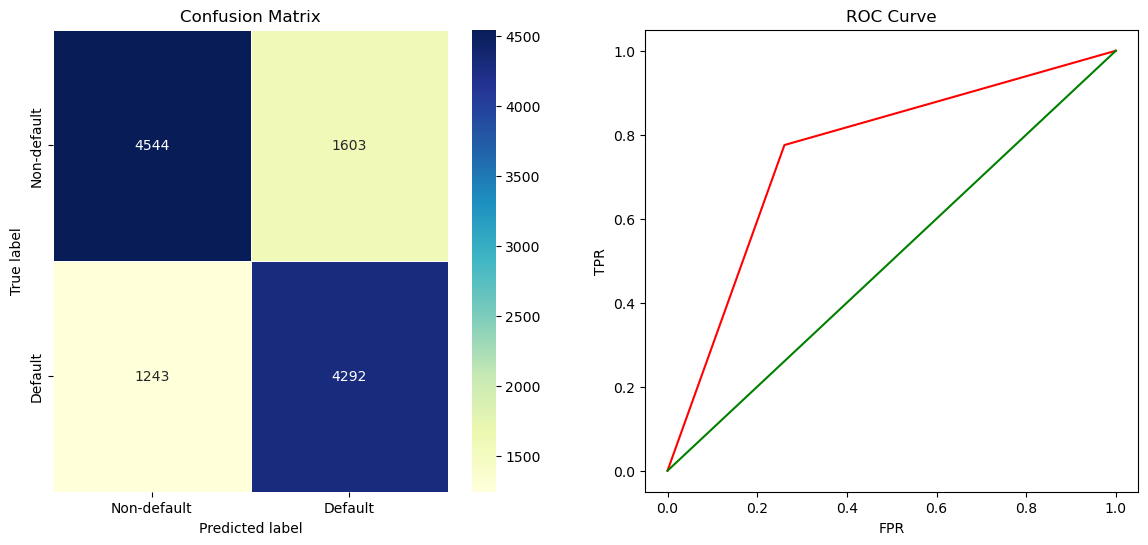

{'Train accuracy': 0.7739256976545112,
 'Test accuracy': 0.7563773326485191,
 'Precision': 0.7754290876242096,
 'Recall': 0.7280746395250212,
 'F1 Score': 0.7510061242344706}

In [29]:
helper(svm,X_train_scaled,y_train,X_test_scaled,y_test)

In [30]:
logger.info('MODEL - SUPPORT VECTOR MACHINE ENDS!')

In [31]:
model={'Logistic Regression':{'Train accuracy': 0.7235918507104948,
 'Test accuracy': 0.7114363978770758,
 'Precision': 0.7158002735978112,
 'Recall': 0.7100932994062765,
 'F1 Score': 0.7129353657498084},'Decicion Tree':{'Train accuracy': 0.9996575928779319,
 'Test accuracy': 0.7482451634994007,
 'Precision': 0.7455119680851063,
 'Recall': 0.7608142493638677,
 'F1 Score': 0.7530853832591722},'Random Forest':{'Train accuracy': 0.9996575928779319,
 'Test accuracy': 0.8412942989214176,
 'Precision': 0.8592,
 'Recall': 0.8198473282442749,
 'F1 Score': 0.8390625},'SVC':{'Train accuracy': 0.7718997888489414,
 'Test accuracy': 0.7563773326485191,
 'Precision': 0.7753296008668954,
 'Recall': 0.7282442748091603,
 'F1 Score': 0.7510496850944717}}

In [32]:
model=pd.DataFrame(model)
model

,Logistic Regression,Decicion Tree,Random Forest,SVC
Train accuracy,0.724134,0.999601,0.999601,0.771900
Test accuracy,0.715374,0.749786,0.845146,0.756377
Precision,0.718463,0.744972,0.861082,0.775330
Recall,0.716879,0.766582,0.826463,0.728244
F1 Score,0.717670,0.755622,0.843417,0.751050


    All model Accuracy was good but Decicion Tree and Random Forest was to good
    Decicion Tree vs Random Frorest
- Both training accuracy was good but Random Forest test accuracy was also high
-  F1 Score is also high for Random Forest 
- So i will go with Random Forest

In [33]:
logger.info('MODELING ENDS!')

# Feature Engineering

In [34]:
logger.info('FEATURE ENGINEERING STARTS!')

In [35]:
CC_DF_FE = CC_DF_final.copy()
CC_DF_FE

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.000000,2,2,1,24.000000,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000.000000,2,2,2,26.000000,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000.000000,2,2,2,34.000000,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000.000000,2,2,1,37.000000,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000.000000,1,2,1,57.000000,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,80000.000000,1,1,1,35.945412,2,1,1,2,2,...,41087,40597,42101,3308,1429,2746,476,2238,2046,1
46724,200000.000000,1,1,1,42.667513,-1,-1,-1,-1,-1,...,480,2517,0,290,79,480,2517,0,228,1
46725,120000.000000,1,2,2,30.443648,1,-2,-2,-2,-2,...,-1946,-1946,-1946,2,0,0,0,0,0,1
46726,194668.588007,1,2,1,33.132565,6,5,4,3,2,...,209623,203659,193689,0,153,0,0,75986,4899,1


In [36]:
CC_DF_FE.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

# AVG_BILL_AMT (creating new column)

In [37]:
CC_DF_FE['AVG_BILL_AMT']=(CC_DF_FE['BILL_AMT1']+CC_DF_FE['BILL_AMT2']+CC_DF_FE['BILL_AMT3']+CC_DF_FE['BILL_AMT4']+CC_DF_FE['BILL_AMT5']+CC_DF_FE['BILL_AMT6']/6)


In [38]:
X=CC_DF_FE.drop('default',axis=1)
y=CC_DF_FE['default']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [40]:
X_train_scaled=scaler.fit_transform(X_train)

In [41]:
X_test_scaled=scaler.transform(X_test)

In [42]:
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9995719910974148
Testing Accuracy Score:  0.8449751754836501
Precision on test data:  0.8582220660576247
Recall on test data:  0.8295126507047037
F1 score on test data:  0.8436231758915466

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17574
           1       1.00      1.00      1.00     17472

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      5990
           1       0.83      0.86      0.84      5692

    accuracy                           0.84     11682
   macro avg       0.85      0.85      0.84     11682
weighted avg       0.85      0.84      0.84     11682




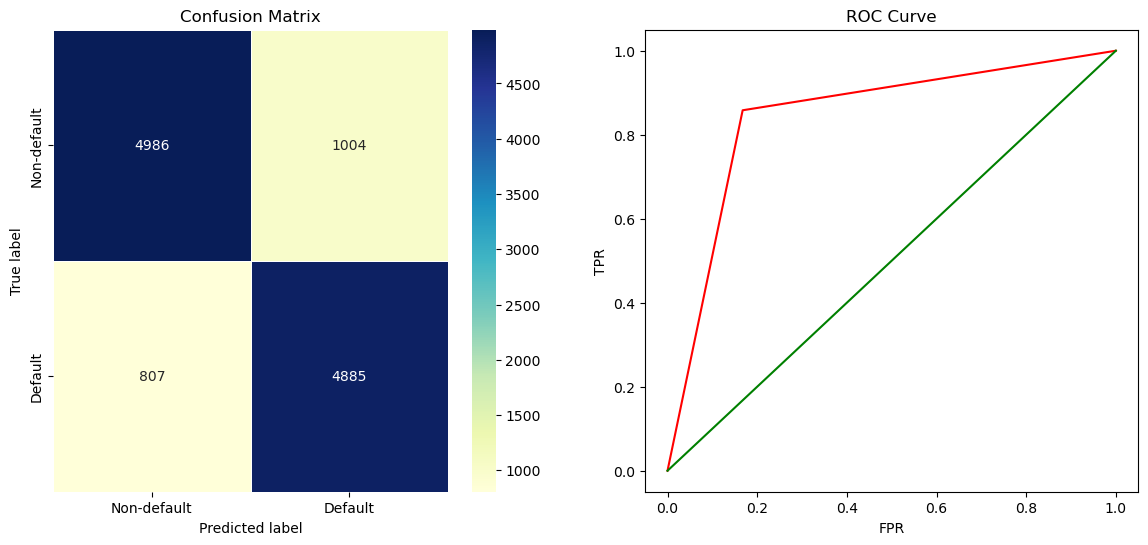

{'Train accuracy': 0.9995719910974148,
 'Test accuracy': 0.8449751754836501,
 'Precision': 0.8582220660576247,
 'Recall': 0.8295126507047037,
 'F1 Score': 0.8436231758915466}

In [43]:
helper(RF,X_train_scaled,y_train,X_test_scaled,y_test)

In [44]:
model['RF with with avg bill']= [ 0.9995719910974148, 0.8475432288991611, 0.8560154331813399, 0.8356445814072933, 0.8457073551069912]

# AVG_PAY_AMT (creating new column)

In [45]:
CC_DF_FE['AVG_PAY_AMT']=(CC_DF_FE['PAY_0']+CC_DF_FE['PAY_2']+CC_DF_FE['PAY_3']+CC_DF_FE['PAY_4']+CC_DF_FE['PAY_5']+CC_DF_FE['PAY_6']/6)
CC_DF_FE.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT,AVG_PAY_AMT
46723,80000.000000,1,1,1,35.945412,2,1,1,2,2,...,42101,3308,1429,2746,476,2238,2046,1,2.027318e+05,8.000000
46724,200000.000000,1,1,1,42.667513,-1,-1,-1,-1,-1,...,0,290,79,480,2517,0,228,1,3.774000e+03,-5.166667
46725,120000.000000,1,2,2,30.443648,1,-2,-2,-2,-2,...,-1946,2,0,0,0,0,0,1,-7.940333e+03,-7.333333
46726,194668.588007,1,2,1,33.132565,6,5,4,3,2,...,193689,0,153,0,0,75986,4899,1,1.162394e+06,20.000000
46727,140000.000000,2,1,1,27.260045,2,2,2,2,2,...,100237,4426,3808,3626,2589,2028,2567,1,5.073232e+05,10.333333


In [46]:
X=CC_DF_FE.drop('default',axis=1)
y=CC_DF_FE['default']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [48]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [49]:
RF.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9996005250242538
Testing Accuracy Score:  0.8447183701420989
Precision on test data:  0.8612389380530974
Recall on test data:  0.8253052917232022
F1 score on test data:  0.8428893123159537

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17576
           1       1.00      1.00      1.00     17470

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      6032
           1       0.83      0.86      0.84      5650

    accuracy                           0.84     11682
   macro avg       0.84      0.85      0.84     11682
weighted avg       0.85      0.84      0.84     11682




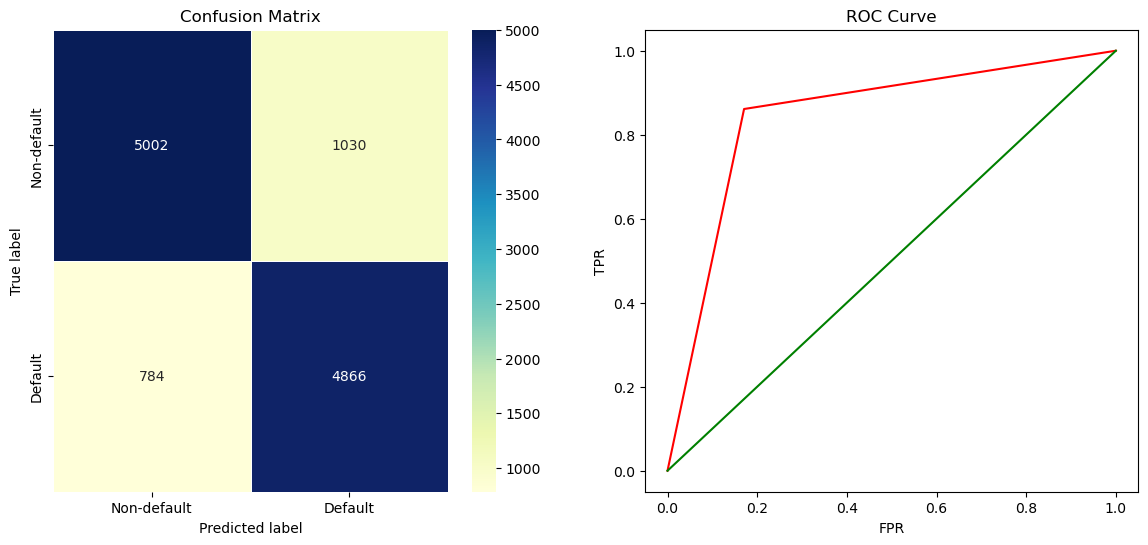

{'Train accuracy': 0.9996005250242538,
 'Test accuracy': 0.8447183701420989,
 'Precision': 0.8612389380530974,
 'Recall': 0.8253052917232022,
 'F1 Score': 0.8428893123159537}

In [50]:
helper(RF,X_train_scaled,y_train,X_test_scaled,y_test)

In [51]:
model['Random Forest with AVG_PAY']=[0.9995434571705758, 0.842321520287622, 0.8546490915568222, 0.8238324175824175, 0.8389578597656933]

In [52]:
logger.info('FEATURE ENGINEERING ENDS!')

In [53]:
model.apply(lambda x:x*100)

,Logistic Regression,Decicion Tree,Random Forest,SVC,RF with with avg bill,Random Forest with AVG_PAY
Train accuracy,72.413400,99.960053,99.960053,77.189979,99.957199,99.954346
Test accuracy,71.537408,74.978600,84.514638,75.637733,84.754323,84.232152
Precision,71.846311,74.497197,86.108165,77.532960,85.601543,85.464909
Recall,71.687871,76.658185,82.646310,72.824427,83.564458,82.383242
F1 Score,71.767003,75.562244,84.341729,75.104969,84.570736,83.895786


    Feature Enginering:
    > After creating new column Average Bill Amount it healped model F1 score.
    > Average Pay Amount was not helpful it actual draged down the F1 Score to 83.89%
    > So I will continue with AVG_BILL and Drop AVG_PAY column

# Final model training with Random Forest and new column AVG_BILL

In [54]:
logger.info('FINAL MODEL BUILDING STARTS!')

In [55]:
CC_DF_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24.0,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000.0,2,2,2,26.0,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000.0,2,2,2,34.0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000.0,2,2,1,37.0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000.0,1,2,1,57.0,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [56]:
CC_DF_final['AVG_BILL_AMT']=(CC_DF_final['BILL_AMT1']+CC_DF_final['BILL_AMT2']+CC_DF_final['BILL_AMT3']+CC_DF_final['BILL_AMT4']+CC_DF_final['BILL_AMT5']+CC_DF_final['BILL_AMT6']/6)
CC_DF_final.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,AVG_BILL_AMT
46723,80000.000000,1,1,1,35.945412,2,1,1,2,2,...,40597,42101,3308,1429,2746,476,2238,2046,1,2.027318e+05
46724,200000.000000,1,1,1,42.667513,-1,-1,-1,-1,-1,...,2517,0,290,79,480,2517,0,228,1,3.774000e+03
46725,120000.000000,1,2,2,30.443648,1,-2,-2,-2,-2,...,-1946,-1946,2,0,0,0,0,0,1,-7.940333e+03
46726,194668.588007,1,2,1,33.132565,6,5,4,3,2,...,203659,193689,0,153,0,0,75986,4899,1,1.162394e+06
46727,140000.000000,2,1,1,27.260045,2,2,2,2,2,...,100041,100237,4426,3808,3626,2589,2028,2567,1,5.073232e+05


In [57]:
X=CC_DF_final.drop('default',axis=1)
y=CC_DF_final['default']

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [59]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [60]:
RF_F=RandomForestClassifier()

In [61]:
RF_F.fit(X_train_scaled,y_train)

RandomForestClassifier()


Training Accuracy Score:  0.9996575928779319
Testing Accuracy Score:  0.8396678650915939
Precision on test data:  0.8593638313080773
Recall on test data:  0.8157760814249364
F1 score on test data:  0.8370028718127229

Classification Report on Train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17579
           1       1.00      1.00      1.00     17467

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046


Classification Report on Test data
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6086
           1       0.82      0.86      0.84      5596

    accuracy                           0.84     11682
   macro avg       0.84      0.84      0.84     11682
weighted avg       0.84      0.84      0.84     11682




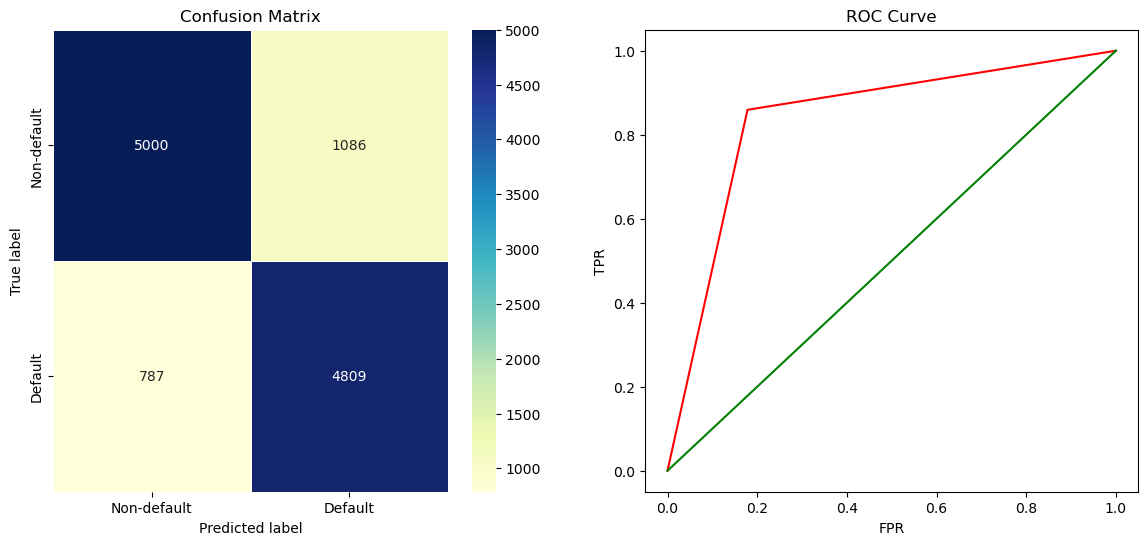

{'Train accuracy': 0.9996575928779319,
 'Test accuracy': 0.8396678650915939,
 'Precision': 0.8593638313080773,
 'Recall': 0.8157760814249364,
 'F1 Score': 0.8370028718127229}

In [62]:
helper(RF_F,X_train_scaled,y_train,X_test_scaled,y_test)

In [63]:
fin_m=({'Scores':{'Train accuracy': 0.9996005250242538,
 'Test accuracy': 0.842492723848656,
 'Precision': 0.855265463465919,
 'Recall': 0.8279898218829517,
 'F1 Score': 0.841406654025168}})
final_model= pd.DataFrame(fin_m)

In [64]:
final_model

,Scores
F1 Score,0.841407
Precision,0.855265
Recall,0.827990
Test accuracy,0.842493
Train accuracy,0.999601


In [65]:
logger.info(final_model)


In [66]:
logger.info('FINAL MODEL BUILDING ENDS!')

# Saving the file

In [67]:
logger.info('SAVING THE MODEL...')

In [68]:
import pickle
pickle.dump(RF_F, open('ccdp.pkl', 'wb'))

logger.info('MODEL SAVED!')

In [69]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# Compress the model.pkl, to easy the process of deployement

In [70]:
import bz2 as bz2

In [71]:
def compressed_pickle(title, data):
    with bz2.BZ2File(title + '.pbz2', 'w') as f:
        pickle.dump(data, f)

In [72]:
compressed_pickle('ccdp', RF_F)

In [73]:
logger.info('PROJECT RUNNING ENDS!')